{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


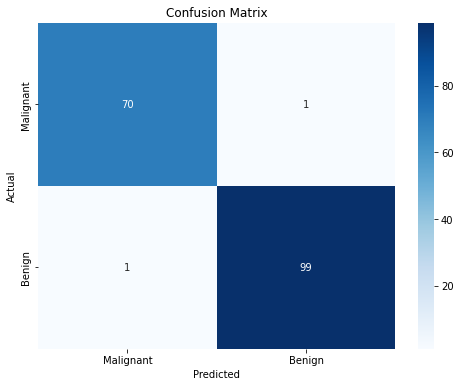

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

# Import data from prof's repository
data = pd.read_csv("/home/pers/allouche/PHY2446M/Data/class_data.csv")
df = pd.DataFrame(data)
df = df.drop(columns=['id', 'Unnamed: 32'])

# Define X and y
y = df['diagnosis'].map({'M': 0, 'B': 1})  # mapping M=>0 and B=>1
X = df.drop(columns=['diagnosis'])

logistic = LogisticRegression(solver='saga')
'''
hyperparameters = {'penalty': ['l1', 'l2'],
                    'C': np.logspace(0, 4, 10)}
'''
hyperparameters = {'penalty': ['l2'],
                    'C': np.logspace(0, 4, 10)}

# Normalization
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the feature data
x_data_normalized = scaler.fit_transform(X)

# x_data_normalized is now a numpy array, you can convert it back to a DataFrame if needed
x_data_normalized_df = pd.DataFrame(x_data_normalized, columns=X.columns)

# Training with train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_normalized_df, y, test_size=0.3)

# Instantiate LogisticRegression
logistic = LogisticRegression()

# Use accuracy as the scoring metric
#scorer = make_scorer(accuracy_score)

# Instantiate GridSearchCV with the logistic regression model and hyperparameters
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

best_params = best_model.best_estimator_.get_params()
print(best_params)

# Predictions
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()